In [1]:
import matplotlib.pylab as pl
%matplotlib inline
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import my

In [2]:
class CNN(nn.Module):
    def __init__(self, n_classes, shape=None):
        super(CNN, self).__init__()
        self.shape = shape
        self.conv1 = nn.Conv2d(shape[0], 16, 3, 2, 1)
        self.conv2 = nn.Conv2d(16, 8, 3, 2, 1)
        self.linear = nn.Linear(8, n_classes)
    
    def forward(self, x):
        if self.shape:
            x = x.view(-1, *self.shape)
        x = F.tanh(self.conv1(x))
        x = F.tanh(self.conv2(x))
        x = F.avg_pool2d(x, x.size()[-1])
        x = self.linear(x.view(-1, 8))
        return x

In [3]:
def sample(module):
    is_cuda = next(module.parameters()).is_cuda
    if is_cuda:
        device = next(module.parameters()).get_device()
    contextualize = lambda x: x.cuda(device) if is_cuda else x
    for p in module.parameters():
        p.data = contextualize(th.rand(p.data.size()) * 2 - 1)

In [4]:
N_TRAIN, N_TEST = 0, 0
BATCH_SIZE = 1024
N_SAMPLES = 10000
cuda = True
if cuda:
    th.cuda.set_device(3)

In [5]:
# MNIST
train_data, train_labels, test_data, test_labels = my.unbalanced_dataset('MNIST', N_TRAIN, N_TEST, p=[])

train_data = th.from_numpy(train_data).float()
train_labels = th.from_numpy(train_labels).long()
test_data = th.from_numpy(test_data).float()
test_labels = th.from_numpy(test_labels).long()

train_loader = DataLoader(TensorDataset(train_data, train_labels), BATCH_SIZE, shuffle=True)
test_loader = DataLoader(TensorDataset(test_data, test_labels), BATCH_SIZE)

N_FEATURES = train_data.size()[1]
N_CLASSES = int(train_labels.max() - train_labels.min() + 1)

In [6]:
# c = nn.Linear(N_FEATURES, N_CLASSES)
c = CNN(N_CLASSES, (1, 28, 28))
if cuda:
    c.cuda()

mnist_f1_list = []
for i in range(N_SAMPLES):
    sample(c)
    f1 = my.global_stats(c, test_loader, my.nd_curry(my.nd_f_beta, N_CLASSES))
    mnist_f1_list.append(float(f1))
    if (i + 1) % 100 == 0:
        print('[turn %d]' % (i + 1))

[turn 100]
[turn 200]
[turn 300]
[turn 400]
[turn 500]
[turn 600]
[turn 700]
[turn 800]
[turn 900]
[turn 1000]
[turn 1100]
[turn 1200]
[turn 1300]
[turn 1400]
[turn 1500]
[turn 1600]
[turn 1700]
[turn 1800]
[turn 1900]
[turn 2000]
[turn 2100]
[turn 2200]
[turn 2300]
[turn 2400]
[turn 2500]
[turn 2600]
[turn 2700]
[turn 2800]
[turn 2900]
[turn 3000]
[turn 3100]
[turn 3200]
[turn 3300]
[turn 3400]
[turn 3500]
[turn 3600]
[turn 3700]
[turn 3800]
[turn 3900]
[turn 4000]
[turn 4100]
[turn 4200]
[turn 4300]
[turn 4400]
[turn 4500]
[turn 4600]
[turn 4700]
[turn 4800]
[turn 4900]
[turn 5000]
[turn 5100]
[turn 5200]
[turn 5300]
[turn 5400]
[turn 5500]
[turn 5600]
[turn 5700]
[turn 5800]
[turn 5900]
[turn 6000]
[turn 6100]
[turn 6200]
[turn 6300]
[turn 6400]
[turn 6500]
[turn 6600]
[turn 6700]
[turn 6800]
[turn 6900]
[turn 7000]
[turn 7100]
[turn 7200]
[turn 7300]
[turn 7400]
[turn 7500]
[turn 7600]
[turn 7700]
[turn 7800]
[turn 7900]
[turn 8000]
[turn 8100]
[turn 8200]
[turn 8300]
[turn 8400]
[

In [7]:
# CIFAR10
train_data, train_labels, test_data, test_labels = my.unbalanced_cifar10(N_TRAIN, N_TEST, p=[])
    
train_data = th.from_numpy(train_data).float()
train_labels = th.from_numpy(train_labels).long()
test_data = th.from_numpy(test_data).float()
test_labels = th.from_numpy(test_labels).long()

train_loader = DataLoader(TensorDataset(train_data, train_labels), BATCH_SIZE, shuffle=True)
test_loader = DataLoader(TensorDataset(test_data, test_labels), BATCH_SIZE)

N_FEATURES = train_data.size()[1]
N_CLASSES = int(train_labels.max() - train_labels.min() + 1)

In [8]:
# c = nn.Linear(N_FEATURES, N_CLASSES)
c = CNN(N_CLASSES, (3, 32, 32))
if cuda:
    c.cuda()

cifar10_f1_list = []
for i in range(N_SAMPLES):
    sample(c)
    f1 = my.global_stats(c, test_loader, my.nd_curry(my.nd_f_beta, N_CLASSES))
    cifar10_f1_list.append(float(f1))
    if (i + 1) % 100 == 0:
        print('[turn %d]' % (i + 1))

[turn 100]
[turn 200]
[turn 300]
[turn 400]
[turn 500]
[turn 600]
[turn 700]
[turn 800]
[turn 900]
[turn 1000]
[turn 1100]
[turn 1200]
[turn 1300]
[turn 1400]
[turn 1500]
[turn 1600]
[turn 1700]
[turn 1800]
[turn 1900]
[turn 2000]
[turn 2100]
[turn 2200]
[turn 2300]
[turn 2400]
[turn 2500]
[turn 2600]
[turn 2700]
[turn 2800]
[turn 2900]
[turn 3000]
[turn 3100]
[turn 3200]
[turn 3300]
[turn 3400]
[turn 3500]
[turn 3600]
[turn 3700]
[turn 3800]
[turn 3900]
[turn 4000]
[turn 4100]
[turn 4200]
[turn 4300]
[turn 4400]
[turn 4500]
[turn 4600]
[turn 4700]
[turn 4800]
[turn 4900]
[turn 5000]
[turn 5100]
[turn 5200]
[turn 5300]
[turn 5400]
[turn 5500]
[turn 5600]
[turn 5700]
[turn 5800]
[turn 5900]
[turn 6000]
[turn 6100]
[turn 6200]
[turn 6300]
[turn 6400]
[turn 6500]
[turn 6600]
[turn 6700]
[turn 6800]
[turn 6900]
[turn 7000]
[turn 7100]
[turn 7200]
[turn 7300]
[turn 7400]
[turn 7500]
[turn 7600]
[turn 7700]
[turn 7800]
[turn 7900]
[turn 8000]
[turn 8100]
[turn 8200]
[turn 8300]
[turn 8400]
[

'mnist: 0.172465; cifar10: 0.194974'

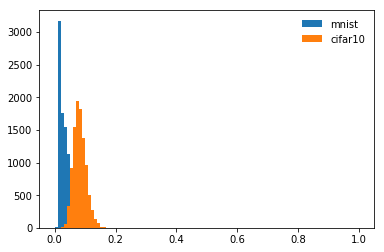

In [9]:
pl.hist(mnist_f1_list, bins=100, range=(0, 1), label='mnist')
pl.hist(cifar10_f1_list, bins=100, range=(0, 1), label='cifar10')
pl.legend(framealpha=0)
'mnist: %f; cifar10: %f' % (max(mnist_f1_list), max(cifar10_f1_list))